# 日経平均株価 5 分足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

In [3]:
code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

In [11]:
# 日足で過去 2 年分のデータを取得
df = ticker.history(period='1d', interval='5m')
 
# ローソク足のチャートには、そのうち過去 1 年分のみ使用する
#dt_last = df0.index[len(df0) - 1]
#tdelta_1d =  datetime.timedelta(days=1)
#df = df0[df0.index >= dt_last - tdelta_1d]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-04-09 09:00:00+09:00,32529.230469,32565.839844,32108.609375,32205.310547,0,0.0,0.0
2025-04-09 09:05:00+09:00,32239.750000,32250.669922,31881.369141,31937.349609,0,0.0,0.0
2025-04-09 09:10:00+09:00,31934.880859,32172.990234,31932.529297,32105.259766,0,0.0,0.0
2025-04-09 09:15:00+09:00,32104.919922,32104.919922,31850.730469,31962.919922,0,0.0,0.0
2025-04-09 09:20:00+09:00,31945.259766,31983.359375,31848.779297,31857.720703,0,0.0,0.0
2025-04-09 09:25:00+09:00,31868.550781,31875.650391,31708.210938,31771.169922,0,0.0,0.0
2025-04-09 09:30:00+09:00,31772.539062,31927.330078,31770.339844,31861.580078,0,0.0,0.0
2025-04-09 09:35:00+09:00,31866.140625,31905.000000,31774.779297,31838.240234,0,0.0,0.0
2025-04-09 09:40:00+09:00,31847.169922,31925.369141,31786.720703,31920.029297,0,0.0,0.0


## Candle Stick Chart

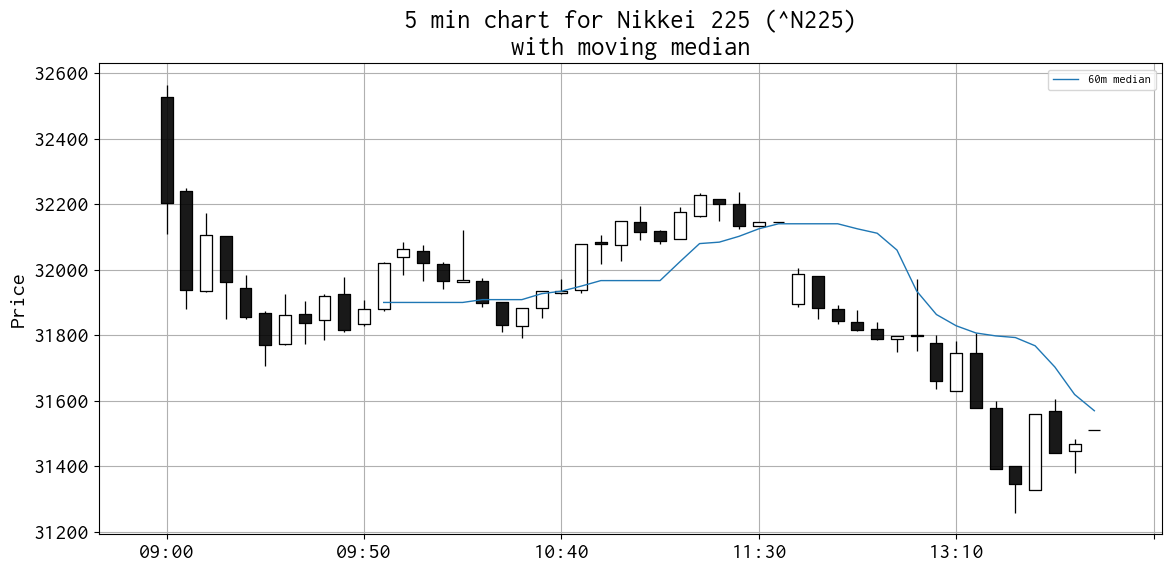

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

mm12 = df['Close'].rolling(12).median()

apds  = [
    mpf.make_addplot(mm12[df.index], width=1, label='60m median', ax=ax),
]   

mpf.plot(df, type='candle', style='default', datetime_format='%H:%M', addplot=apds, xrotation=0, ax=ax)

try:
    ax.set_title('5 min chart for %s (%s)\nwith moving median' % (ticker.info['shortName'], symbol))
except KeyError:
    ax.set_title('5 min chart for %s\nwith moving median' % (symbol, period))

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('report_daily_chart_median_%s.png' % code)
plt.show()

In [14]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-04-09 13:40:00+09:00,31446.589844,31483.119141,31378.859375,31469.960938,0,0.0,0.0
2025-04-09 13:45:00+09:00,31511.509766,31511.509766,31511.509766,31511.509766,0,0.0,0.0


In [15]:
df.tail(2)['Close']

Datetime
2025-04-09 13:40:00+09:00    31469.960938
2025-04-09 13:45:00+09:00    31511.509766
Name: Close, dtype: float64

In [16]:
df.tail(2)['Close'].diff()

Datetime
2025-04-09 13:40:00+09:00          NaN
2025-04-09 13:45:00+09:00    41.548828
Name: Close, dtype: float64

In [17]:
df['Close'].tail(1) - df['Open'].tail(1)

Datetime
2025-04-09 13:45:00+09:00    0.0
dtype: float64

In [18]:
df['Close'].rolling(9).median().tail()

Datetime
2025-04-09 13:25:00+09:00    31747.630859
2025-04-09 13:30:00+09:00    31659.519531
2025-04-09 13:35:00+09:00    31579.919922
2025-04-09 13:40:00+09:00    31560.199219
2025-04-09 13:45:00+09:00    31511.509766
Name: Close, dtype: float64

In [19]:
df['Close'].rolling(13).median().tail()

Datetime
2025-04-09 13:25:00+09:00    31797.939453
2025-04-09 13:30:00+09:00    31789.240234
2025-04-09 13:35:00+09:00    31747.630859
2025-04-09 13:40:00+09:00    31659.519531
2025-04-09 13:45:00+09:00    31579.919922
Name: Close, dtype: float64

In [20]:
df['Close'].rolling(26).median().tail()

Datetime
2025-04-09 13:25:00+09:00    31935.150391
2025-04-09 13:30:00+09:00    31935.150391
2025-04-09 13:35:00+09:00    31909.879883
2025-04-09 13:40:00+09:00    31863.909180
2025-04-09 13:45:00+09:00    31829.544922
Name: Close, dtype: float64

In [21]:
df['Close'].rolling(52).median().tail()

Datetime
2025-04-09 13:25:00+09:00   NaN
2025-04-09 13:30:00+09:00   NaN
2025-04-09 13:35:00+09:00   NaN
2025-04-09 13:40:00+09:00   NaN
2025-04-09 13:45:00+09:00   NaN
Name: Close, dtype: float64

## ヒストグラムと Q-Q プロット

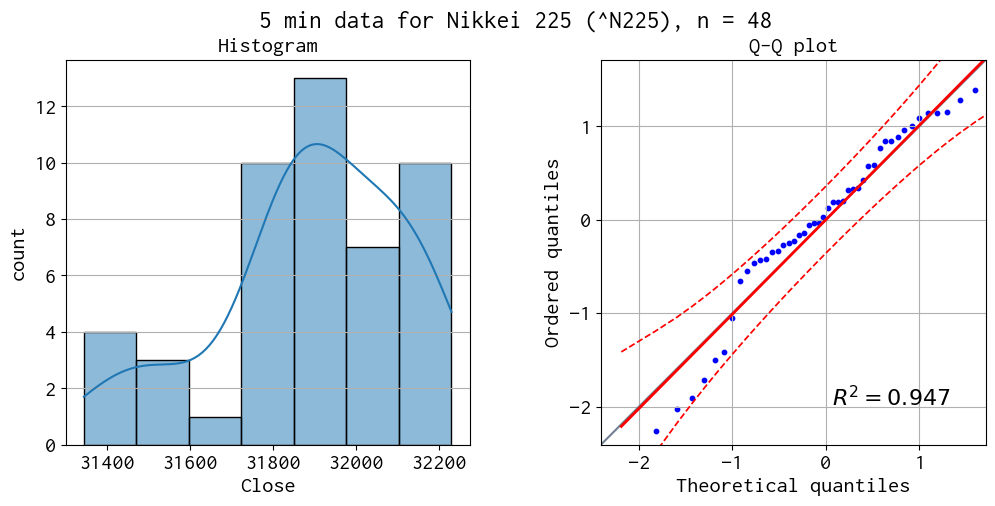

In [22]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('5 min data for %s (%s), n = %d' % (ticker.info['shortName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_5min_histogram_qqplot_%s.png' % code)
plt.show()

In [16]:
ticker.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 32245.0,
 'open': 32145.0,
 'dayLow': 31720.0,
 'dayHigh': 32320.0,
 'regularMarketPreviousClose': 32245.0,
 'regularMarketOpen': 32145.0,
 'regularMarketDayLow': 31720.0,
 'regularMarketDayHigh': 32320.0,
 'volume': 9441,
 'regularMarketVolume': 9441,
 'averageVolume': 9735,
 'averageVolume10days': 0,
 'averageDailyVolume10Day': 0,
 'bid': 32050.0,
 'ask': 32055.0,
 'bidSize': 8,
 'askSize': 9,
 'expireDate': 1749772800,
 'openInterest': 36515,
 'fiftyTwoWeekLow': 31720.0,
 'fiftyTwoWeekHigh': 42430.0,
 'fiftyDayAverage': 37534.94,
 'twoHundredDayAverage': 38360.414,
 'currency': 'JPY',
 'tradeable': False,
 'quoteType': 'FUTURE',
 'symbol': 'NIY=F',
 'language': 'en-US',
 'region': 'US',
 'typeDisp': 'Futures',
 'quoteSourceName': 'Delayed Quote',
 'triggerable': False,
 'customPriceAlertConfidence': 'NONE',
 'headSymbolAsString': 'NIY=F',
 'contractSymbol': False,
 'shortName': 'Nikkei/Yen Futures,Jun-2025',
 'exchangeTimezoneShor